In [2]:
import numpy as np
from brian2 import *

In [3]:
q_val_n1=np.zeros((1,2)) #agent 1 : neuron 1
q_val_n2 = np.zeros((1,2)) #agent 2 : neuron 2
q_val_n3 = np.zeros((1,2)) #agent 3 : neuron 3
q_val_n4 = np.zeros((1,2)) #agent 4 : neuron 4
q_val_n5 = np.zeros((1,2)) #agent 5 : neuron 5
q_val_n6 = np.zeros((1,2)) #agent 6 : neuron 6
q_val_n7 = np.zeros((1,2)) #agent 7 : neuron 7
q_val_n8 = np.zeros((1,2)) #agent 8 : neuron 8

In [4]:
#definitions of neurons
start_scope()
weight = 0.1
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
#creating environment
for i in range(0,200):
    indices1 = array([0, 1, 2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2])
    times = array([1,1,1,3,3,3,5,5,5,7,7,7,9,9,9,11,11,11,13,13,13,15,15,15,17,17,17])*ms

    Gi = SpikeGeneratorGroup(3, indices1, times)#first layer(input)
    #first layer
    G1 = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0',method = 'exact')
    S1 = Synapses(Gi, G1, on_pre='v += weight')
    S1.connect()


    #second layer
    G2 = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0',method = 'exact')
    S2 = Synapses(G1, G2, on_pre='v += weight')
    S2.connect()


#third layer
    G3 = NeuronGroup(1, eqs, threshold='v>1', reset='v = 0',method = 'exact')
    S3 = Synapses(G2,G3,on_pre = 'v+=weight')
    S3.connect()

    M = SpikeMonitor(Gi)
    M1 = SpikeMonitor(G1)
    M2 = SpikeMonitor(G2)
    M3 = SpikeMonitor(G3)
    statemon1 = StateMonitor(G1, 'v', record=True)
    statemon2 = StateMonitor(G2, 'v', record=True)
    statemon3 = StateMonitor(G3, 'v', record=True)
    
    run(20*ms)
figure(figsize=(12,4))
subplot(121)
plot(statemon1.t/ms, statemon1.v[0]/mV)
subplot(122)
plot(statemon2.t/ms, statemon2.v[0]/mV)


{'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}}
{'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}}
{'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}}
_cython_magic_31fd5a208fa8b16d4873d00113882f62.cpp
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
_cython_magic_31fd5a208fa8b16d4873d00113882f62.obj : warning LNK4197: export 'PyInit__cython_magic_31fd5a208fa8b16d4873d00113882f62' specified multiple times; using first specification
   Creating library C:\Users\user\.cython\brian_extensions\Users\user\.cython\brian_extensions\_cython_magic_31fd5a208fa8b16d4873d00113882f62.cp36-win_amd64.lib and object C:\Users\user\.cython\brian_extensions\Users\user\.cython\brian_extensions\_cython_magic_31fd5a208fa8b16d4

cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warnin

KeyboardInterrupt: 

In [5]:
M2.all_values()

{'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}

In [6]:
M3.all_values()

{'t': {0: array([17.3]) * msecond}}

In [7]:
max(statemon3.v[0])

1.0227155900301206

In [189]:
#definition of action
action = [0,1]
# 0 -> connect
# 1 -> disconnect
#definition of rewards:
reward = 0
action_reward = {
    0 :-1,
    1 : 1
}
goal = 1.0227155900301206

In [190]:
#definitions of neurons
start_scope()
weight = 0.1
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
#creating environment
indices1 = array([0, 1, 2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2])
times = array([1,1,1,3,3,3,5,5,5,7,7,7,9,9,9,11,11,11,13,13,13,15,15,15,17,17,17])*ms

Gi = SpikeGeneratorGroup(3, indices1, times)#first layer(input)
#first layer
G1 = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0',method = 'exact')
S1 = Synapses(Gi, G1, on_pre='v += weight')
#S1.connect()

#second layer
G2 = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0',method = 'exact')
S2 = Synapses(G1, G2, on_pre='v += weight')
#S2.connect()


#third layer
G3 = NeuronGroup(1, eqs, threshold='v>1', reset='v = 0',method = 'exact')
S3 = Synapses(G2,G3,on_pre = 'v+=weight')
#S3.connect()

M = SpikeMonitor(Gi)
M1 = SpikeMonitor(G1)
M2 = SpikeMonitor(G2)
M3 = SpikeMonitor(G3)
statemon1 = StateMonitor(G1, 'v', record=True)
statemon2 = StateMonitor(G2, 'v', record=True)
statemon3 = StateMonitor(G3, 'v', record=True)


In [191]:
#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(q_val, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, 
  #then choose the most promising value from the Q-table for this state.
    if np.random.random() < epsilon:
        return np.argmax(q_val)
    else: #choose a random action
        return np.random.randint(2)

neuron1 [[-0.9  0. ]] 0 -1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron2 [[-0.9  0. ]] 0 -1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron1 [[-0.9  0.9]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron2 [[-0.9  1.8]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron1 [[-0.261  0.9  ]] 0 -1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron2 [[-0.9    1.638]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron1 [[-0.261  1.719]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron2 [[-0.9      2.47158]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron1 [[-0.261    2.46429]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron2 [[-0.9        3.1418478]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron1 [[-0.261      3.1425039]] 1 1 {'t': {0: array([17

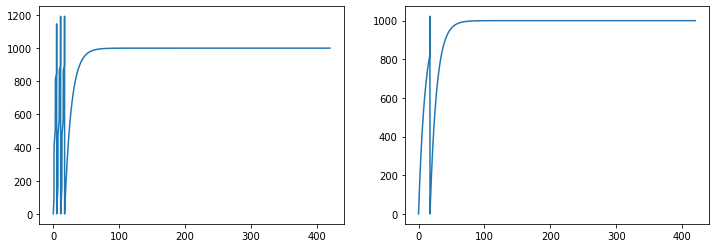

In [148]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
gamma = 0.9 #discount factor for future rewards
alpha = 0.9 #the rate at which the AI agent should learn
a=1
store()
for episode in range(20):
    #begining new episode
    #S1.connect()
    S2.connect()
    S3.connect()
    #choose action
    action_index1 = get_next_action(q_val_n1,epsilon)
    action_index2 = get_next_action(q_val_n2,epsilon)
    action_index3 = get_next_action(q_val_n3,epsilon)
    action_index4 = get_next_action(q_val_n4,epsilon)
    action_index5 = get_next_action(q_val_n5,epsilon)
    action_index6 = get_next_action(q_val_n6,epsilon)
    ction_index7  = get_next_action(q_val_n7,epsilon)
    ction_index8  = get_next_action(q_val_n8,epsilon)
    #performe the chosen action and transition to the new state
    if action_index1 == 0:
        S1.connect(i=[1,2],j=[0,1])
        reward = action_reward[0]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])
    if action_index1 ==1:
        #S1.connect(i=[1,2],j=[0,1])
        #S1.connect(i=0,j=[0,1])
        S1.connect()
        S2.connect()
        S3.connect()
        reward = action_reward[1]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])

    print('neuron1',q_val_n1,action_index1,reward,M2.all_values())
    
    if action_index2 == 0:
        S1.connect(i=[0,2],j=[0,1])
        reward = action_reward[0]
        q_val_n2[0,action_index2] = q_val_n2[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])
    
    if action_index2 ==1:
        S1.connect()
        reward = action_reward[1]
        q_val_n2[0,action_index2] = q_val_n1[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])

    print('neuron2',q_val_n2,action_index2,reward,M2.all_values())
    
    
    
    
    run(20*ms)
figure(figsize=(12,4))
subplot(121)
plot(statemon1.t/ms, statemon1.v[0]/mV)
subplot(122)
plot(statemon3.t/ms, statemon3.v[0]/mV)



neuron1 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron2 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron1 [[-0.9  0.9]] 1 1 {'t': {0: array([15.2]) * msecond, 1: array([15.2]) * msecond}} {'t': {0: array([], dtype=float64) * second}}
neuron2 [[-0.9  1.8]] 1 1 {'t': {0: array([15.2]) * msecond, 1: array([15.2]) * msecond}} {'t': {0: array([], dtype=float64) * second}}
neuron1 [[-0.9    1.719]] 1 1 {'t': {0: array([15.2]) * msecond, 1: array([15.2]) * msecond}} {'t': {0: array([], dtype=float64) * second}}
neuron2 [[-0.9    2.457]] 1 1 {'t': {0: array([15.2]) * msecond, 1: array([15.2]) * msecond}} {'t': {0: array([], dtype=float64) * second}}
neuron1 [[-0.9      2.46429]] 1 1 {'t': {0: array([15.2]) * msecond, 1: array([15.2]) * msecond}} {'t': {0: array([], dtype=float64) *

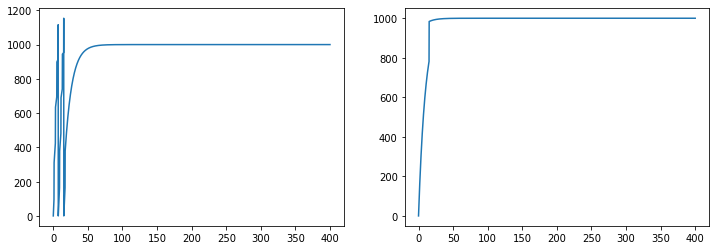

In [162]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
gamma = 0.9 #discount factor for future rewards
alpha = 0.9 #the rate at which the AI agent should learn
a=1
store()
for episode in range(20):
    #begining new episode
    #S1.connect()
    S2.connect()
    S3.connect()
    #choose action
    action_index1 = get_next_action(q_val_n1,epsilon)
    action_index2 = get_next_action(q_val_n2,epsilon)
    action_index3 = get_next_action(q_val_n3,epsilon)
    action_index4 = get_next_action(q_val_n4,epsilon)
    action_index5 = get_next_action(q_val_n5,epsilon)
    action_index6 = get_next_action(q_val_n6,epsilon)
    ction_index7  = get_next_action(q_val_n7,epsilon)
    ction_index8  = get_next_action(q_val_n8,epsilon)
    #performe the chosen action and transition to the new state
    if action_index1 == 0:
        S1.connect(i=[1,2],j=[0,1])
        reward = action_reward[0]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])
    if action_index1 ==1:
        #S1.connect(i=[1,2],j=[0,1])
        #S1.connect(i=0,j=[0,1])
        S1.connect()
        S2.connect()
        S3.connect()
        reward = action_reward[1]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])

    print('neuron1',q_val_n1,action_index1,reward,M2.all_values(),M3.all_values())
    
    if action_index2 == 0:
        S1.connect(i=[0,2],j=[0,1])
        reward = action_reward[0]
        q_val_n2[0,action_index2] = q_val_n2[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])
    
    if action_index2 ==1:
        S1.connect()
        reward = action_reward[1]
        q_val_n2[0,action_index2] = q_val_n1[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])

    print('neuron2',q_val_n2,action_index2,reward,M2.all_values(),M3.all_values())
    
    if action_index3 == 0:
        S1.connect(i=[0,1],j=[0,1])
        reward = action_reward[0]
        q_val_n3[0,action_index3] = q_val_n3[0,action_index3] + alpha*(reward+gamma*(max(q_val_n3[0]))-q_val_n3[0,action_index3])
    
    if action_index3 ==1:
        S1.connect()
        reward = action_reward[1]
        q_val_n3[0,action_index3] = q_val_n3[0,action_index3] + alpha*(reward+gamma*(max(q_val_n3[0]))-q_val_n3[0,action_index3])

    print('neuron3',q_val_n3,action_index3,reward,M2.all_values())
    
    
    run(20*ms)
figure(figsize=(12,4))
subplot(121)
plot(statemon1.t/ms, statemon1.v[0]/mV)
subplot(122)
plot(statemon3.t/ms, statemon3.v[0]/mV)


In [ ]:
    #recieve the reward for moving to the new state
        #if max(statemon3.v[0] )< goal:
        reward = action_reward[0]
    #update Q-table for neuron 1
        q_val_n1[0] =  q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])
    if action_index1 == 1:
        S1.connect(i=[0,1,2],j=[0,1])
        #if max(statemon3.v[0] ) == goal:
        reward = action_reward[1]
        q_val_n1[0] =  q_val[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])
    
    #performe the chosen action and transition to the new state
    if action_index2 == 0:
        S1.connect(i=[0,2],j=[0,1])
    #recieve the reward for moving to the new state
        #if max(statemon3.v[0] )< goal:
        reward = action_reward[0]
    #update Q-table for neuron 1
        q_val_n2[0] =  q_val_n2[0,action_index2] = q_val_n2[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])
    else:
         S1.connect(i=[0,1,2],j=[0,1])
        #if max(statemon3.v[0] ) == goal:
        reward = action_reward[1]
         q_val_n2[0] =  q_val_n2[0,action_index2] = q_val_n2[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])
            
    run(20*ms)
    print(q_val_n1,action_index1,reward)
    print(q_val_n2,action_index2,reward)

In [185]:
M2.all_values()

{'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}

neuron1 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron2 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron3 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}}
neuron1 [[-0.9  0.9]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}} {'t': {0: array([17.3]) * msecond}}
neuron2 [[-0.9  1.8]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}} {'t': {0: array([17.3]) * msecond}}
neuron3 [[-0.9  0.9]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}}
neuron1 [[-0.9    1.719]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}} {'t': {0: array([17.3]) * msecond}}
neuron2 [[-0.9    2.457]] 1 1 {'t': {0: array([17.2]) * msecond, 1: array([17.2]) * msecond}} {'t': {0:

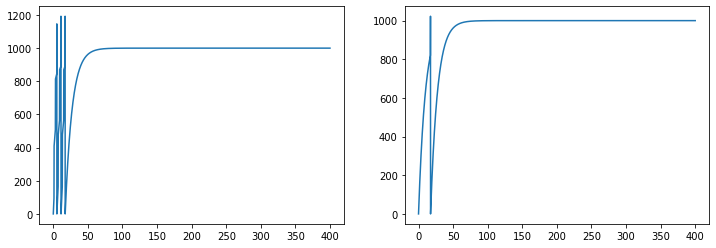

In [167]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
gamma = 0.9 #discount factor for future rewards
alpha = 0.9 #the rate at which the AI agent should learn
a=1
store()
for episode in range(20):
    #begining new episode
    #S1.connect()
    S2.connect()
    S3.connect()
    #choose action
    action_index1 = get_next_action(q_val_n1,epsilon)
    action_index2 = get_next_action(q_val_n2,epsilon)
    action_index3 = get_next_action(q_val_n3,epsilon)
    action_index4 = get_next_action(q_val_n4,epsilon)
    action_index5 = get_next_action(q_val_n5,epsilon)
    action_index6 = get_next_action(q_val_n6,epsilon)
    ction_index7  = get_next_action(q_val_n7,epsilon)
    ction_index8  = get_next_action(q_val_n8,epsilon)
    #performe the chosen action and transition to the new state
    if action_index1 == 0:
        S1.connect(i=[1,2],j=[0,1])
        reward = action_reward[0]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])
    if action_index1 ==1:
        #S1.connect(i=[1,2],j=[0,1])
        #S1.connect(i=0,j=[0,1])
        S1.connect()
        S2.connect()
        S3.connect()
        reward = action_reward[1]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])

    print('neuron1',q_val_n1,action_index1,reward,M2.all_values(),M3.all_values())
    
    if action_index2 == 0:
        S1.connect(i=[0,2],j=[0,1])
        reward = action_reward[0]
        q_val_n2[0,action_index2] = q_val_n2[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])
    
    if action_index2 ==1:
        S1.connect()
        reward = action_reward[1]
        q_val_n2[0,action_index2] = q_val_n1[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])

    print('neuron2',q_val_n2,action_index2,reward,M2.all_values(),M3.all_values())
    
    if action_index3 == 0:
        S1.connect(i=[0,1],j=[0,1])
        reward = action_reward[0]
        q_val_n3[0,action_index3] = q_val_n3[0,action_index3] + alpha*(reward+gamma*(max(q_val_n3[0]))-q_val_n3[0,action_index3])
    
    if action_index3 ==1:
        S1.connect()
        reward = action_reward[1]
        q_val_n3[0,action_index3] = q_val_n3[0,action_index3] + alpha*(reward+gamma*(max(q_val_n3[0]))-q_val_n3[0,action_index3])

    print('neuron3',q_val_n3,action_index3,reward,M2.all_values())
    
    
    run(20*ms)
figure(figsize=(12,4))
subplot(121)
plot(statemon1.t/ms, statemon1.v[0]/mV)
subplot(122)
plot(statemon3.t/ms, statemon3.v[0]/mV)


neuron1 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron2 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron3 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron4 [[-0.9  0. ]] 0 -1 {'t': {0: array([], dtype=float64) * second, 1: array([], dtype=float64) * second}} {'t': {0: array([], dtype=float64) * second}}
neuron1 [[-0.9  0.9]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron2 [[-0.99  0.  ]] 0 -1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron3 [[-0.9  0.9]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * m

neuron1 [[-0.9         7.32958049]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron2 [[-0.99        7.56991824]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron3 [[1.0060749  7.06547306]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron4 [[-0.9         7.32958049]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron1 [[-0.9         7.56991824]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron2 [[-0.99       7.7886256]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.2, 15.2]) * msecond}} {'t': {0: array([15.3]) * msecond}}
neuron3 [[1.0060749  7.32958049]] 1 1 {'t': {0: array([ 7.2, 15.2]) * msecond, 1: array([ 7.

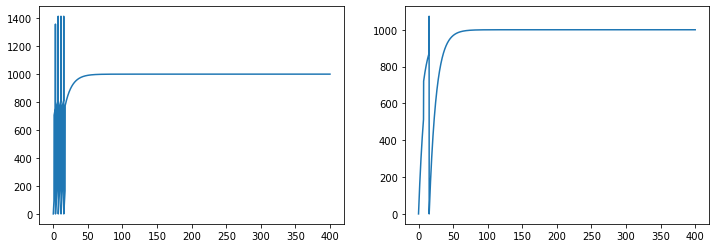

In [192]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
gamma = 0.9 #discount factor for future rewards
alpha = 0.9 #the rate at which the AI agent should learn
a=1
store()
for episode in range(20):
    #begining new episode
    #S1.connect()
    S2.connect()
    S3.connect()
    #choose action
    action_index1 = get_next_action(q_val_n1,epsilon)
    action_index2 = get_next_action(q_val_n2,epsilon)
    action_index3 = get_next_action(q_val_n3,epsilon)
    action_index4 = get_next_action(q_val_n4,epsilon)
    action_index5 = get_next_action(q_val_n5,epsilon)
    action_index6 = get_next_action(q_val_n6,epsilon)
    ction_index7  = get_next_action(q_val_n7,epsilon)
    ction_index8  = get_next_action(q_val_n8,epsilon)
    #performe the chosen action and transition to the new state
    if action_index1 == 0:
        S1.connect(i=[1,2],j=[0,1])
        reward = action_reward[0]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])
    if action_index1 ==1:
        #S1.connect(i=[1,2],j=[0,1])
        #S1.connect(i=0,j=[0,1])
        S1.connect()
        S2.connect()
        S3.connect()
        reward = action_reward[1]
        q_val_n1[0,action_index1] = q_val_n1[0,action_index1] + alpha*(reward+gamma*(max(q_val_n1[0]))-q_val_n1[0,action_index1])

    print('neuron1',q_val_n1,action_index1,reward,M2.all_values(),M3.all_values())
    
    if action_index2 == 0:
        S1.connect(i=[0,2],j=[0,1])
        reward = action_reward[0]
        q_val_n2[0,action_index2] = q_val_n2[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])
    
    if action_index2 ==1:
        S1.connect()
        reward = action_reward[1]
        q_val_n2[0,action_index2] = q_val_n1[0,action_index2] + alpha*(reward+gamma*(max(q_val_n2[0]))-q_val_n2[0,action_index2])

    print('neuron2',q_val_n2,action_index2,reward,M2.all_values(),M3.all_values())
    
    if action_index3 == 0:
        S1.connect(i=[0,1],j=[0,1])
        reward = action_reward[0]
        q_val_n3[0,action_index3] = q_val_n3[0,action_index3] + alpha*(reward+gamma*(max(q_val_n3[0]))-q_val_n3[0,action_index3])
    
    if action_index3 ==1:
        S1.connect()
        reward = action_reward[1]
        q_val_n3[0,action_index3] = q_val_n3[0,action_index3] + alpha*(reward+gamma*(max(q_val_n3[0]))-q_val_n3[0,action_index3])

    print('neuron3',q_val_n3,action_index3,reward,M2.all_values(),M3.all_values())
    
    if action_index4 == 0:
        S1.connect()
        S2.connect(i=1,j=[0,1])
        reward = action_reward[0]
        q_val_n4[0,action_index4] = q_val_n4[0,action_index4] + alpha*(reward+gamma*(max(q_val_n4[0]))-q_val_n4[0,action_index4])
    
    if action_index4 ==1:
        S1.connect()
        S2.connect()
        reward = action_reward[1]
        q_val_n4[0,action_index4] = q_val_n4[0,action_index4] + alpha*(reward+gamma*(max(q_val_n4[0]))-q_val_n4[0,action_index4])

    print('neuron4',q_val_n4,action_index4,reward,M2.all_values(),M3.all_values())
    
    
    run(20*ms)
figure(figsize=(12,4))
subplot(121)
plot(statemon1.t/ms, statemon1.v[0]/mV)
subplot(122)
plot(statemon3.t/ms, statemon3.v[0]/mV)
